In [121]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.datasets import copper
import statsmodels.api as sms
from statsmodels.stats.anova import anova_lm
from sklearn.model_selection import train_test_split
from statsmodels.formula.api import ols

In [122]:
from statsmodels.datasets import copper

prices = copper.data.load_pandas()
prices['data']

,WORLDCONSUMPTION,COPPERPRICE,INCOMEINDEX,ALUMPRICE,INVENTORYINDEX,TIME
0,3173.0,26.56,0.70,19.76,0.98,1.0
1,3281.1,27.31,0.71,20.78,1.04,2.0
2,3135.7,32.95,0.72,22.55,1.05,3.0
3,3359.1,33.90,0.70,23.06,0.97,4.0
4,3755.1,42.70,0.74,24.93,1.02,5.0
5,3875.9,46.11,0.74,26.50,1.04,6.0
6,3905.7,31.70,0.74,27.24,0.98,7.0
7,3957.6,27.23,0.72,26.21,0.98,8.0
8,4279.1,32.89,0.75,26.09,1.03,9.0
9,4627.9,33.78,0.77,27.40,1.03,10.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   WORLDCONSUMPTION  25 non-null     float64
 1   COPPERPRICE       25 non-null     float64
 2   INCOMEINDEX       25 non-null     float64
 3   ALUMPRICE         25 non-null     float64
 4   INVENTORYINDEX    25 non-null     float64
 5   TIME              25 non-null     float64
 6   CONSTANT          25 non-null     int64  
dtypes: float64(6), int64(1)
memory usage: 1.5 KB


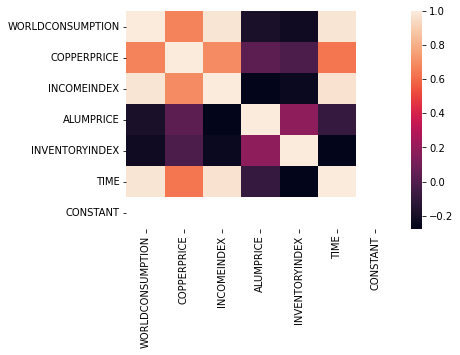

In [123]:

data=prices['data']
data["CONSTANT"]=pd.Series([1 for i in range(len(data.index))])
sns.heatmap(data.corr())
data.info()

In [124]:
data.head()

,WORLDCONSUMPTION,COPPERPRICE,INCOMEINDEX,ALUMPRICE,INVENTORYINDEX,TIME,CONSTANT
0,3173.0,26.56,0.70,19.76,0.98,1.0,1
1,3281.1,27.31,0.71,20.78,1.04,2.0,1
2,3135.7,32.95,0.72,22.55,1.05,3.0,1
3,3359.1,33.90,0.70,23.06,0.97,4.0,1
4,3755.1,42.70,0.74,24.93,1.02,5.0,1


In [125]:
model1 = ols('WORLDCONSUMPTION ~ COPPERPRICE +	INCOMEINDEX +	ALUMPRICE +	INVENTORYINDEX + TIME + CONSTANT -1', data).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       WORLDCONSUMPTION   R-squared:                       0.978
Model:                            OLS   Adj. R-squared:                  0.973
Method:                 Least Squares   F-statistic:                     171.0
Date:                Fri, 01 Apr 2022   Prob (F-statistic):           4.11e-15
Time:                        21:40:02   Log-Likelihood:                -172.61
No. Observations:                  25   AIC:                             357.2
Df Residuals:                      19   BIC:                             364.5
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
COPPERPRICE       15.0432     14.761      1.019      0.321     -15.852      45.938
INCOMEINDEX     1442.8858   3168.592      0.455      0.654   -5189.054    8074.826
ALUMPRICE        -64.1230     47.258     -1.357      0.191    -163.035      34.789
INVENTORYINDEX  2450.3845   1827.270      1.341      0.196   -1374.136    6274.905
TIME             187.2307     54.595      3.429      0.003      72.961     301.500
CONSTANT         283.9552   2768.572      0.103      0.919   -5510.733    6078.644
==============================================================================
Omnibus:                        8.395   Durbin-Watson:                   1.312
Prob(Omnibus):                  0.015   Jarque-Bera (JB):                6.465
Skew:                          -0.959   Prob(JB):                       0.0395
Kurtosis:                       4.589   Cond. No.                     3.36e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.36e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Backward elimination will be applied. Significance level is 0.05, so the term with p value higher than significance leve will be removed. 

In [126]:
model2 = ols('WORLDCONSUMPTION ~ COPPERPRICE +	INCOMEINDEX +	ALUMPRICE +	INVENTORYINDEX + TIME -1', data).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:       WORLDCONSUMPTION   R-squared (uncentered):                   0.998
Model:                            OLS   Adj. R-squared (uncentered):              0.998
Method:                 Least Squares   F-statistic:                              2209.
Date:                Fri, 01 Apr 2022   Prob (F-statistic):                    1.05e-26
Time:                        21:40:03   Log-Likelihood:                         -172.62
No. Observations:                  25   AIC:                                      355.2
Df Residuals:                      20   BIC:                                      361.3
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
COPPERPRICE       14.2220     12.090      1.176      0.253     -10.998      39.442
INCOMEINDEX     1693.1662   1970.555      0.859      0.400   -2417.339    5803.671
ALUMPRICE        -60.6381     32.023     -1.894      0.073    -127.437       6.161
INVENTORYINDEX  2515.3749   1670.948      1.505      0.148    -970.162    6000.912
TIME             183.1930     36.879      4.967      0.000     106.264     260.122
==============================================================================
Omnibus:                        8.007   Durbin-Watson:                   1.316
Prob(Omnibus):                  0.018   Jarque-Bera (JB):                6.014
Skew:                          -0.936   Prob(JB):                       0.0494
Kurtosis:                       4.506   Cond. No.                     2.20e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 2.2e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [127]:
model3 = ols('WORLDCONSUMPTION ~ COPPERPRICE +	ALUMPRICE +	INVENTORYINDEX + TIME -1', data).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:       WORLDCONSUMPTION   R-squared (uncentered):                   0.998
Model:                            OLS   Adj. R-squared (uncentered):              0.998
Method:                 Least Squares   F-statistic:                              2796.
Date:                Fri, 01 Apr 2022   Prob (F-statistic):                    2.66e-28
Time:                        21:40:03   Log-Likelihood:                         -173.07
No. Observations:                  25   AIC:                                      354.1
Df Residuals:                      21   BIC:                                      359.0
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
COPPERPRICE       19.2497     10.514      1.831      0.081      -2.616      41.115
ALUMPRICE        -79.3500     23.331     -3.401      0.003    -127.870     -30.830
INVENTORYINDEX  3844.7379    627.239      6.130      0.000    2540.322    5149.154
TIME             213.7095      9.872     21.647      0.000     193.179     234.240
==============================================================================
Omnibus:                        4.190   Durbin-Watson:                   1.446
Prob(Omnibus):                  0.123   Jarque-Bera (JB):                2.467
Skew:                          -0.694   Prob(JB):                        0.291
Kurtosis:                       3.663   Cond. No.                         548.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [128]:
model4 = ols('WORLDCONSUMPTION ~ALUMPRICE +	INVENTORYINDEX + TIME -1', data).fit()
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:       WORLDCONSUMPTION   R-squared (uncentered):                   0.998
Model:                            OLS   Adj. R-squared (uncentered):              0.998
Method:                 Least Squares   F-statistic:                              3367.
Date:                Fri, 01 Apr 2022   Prob (F-statistic):                    1.97e-29
Time:                        21:40:03   Log-Likelihood:                         -174.92
No. Observations:                  25   AIC:                                      355.8
Df Residuals:                      22   BIC:                                      359.5
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
ALUMPRICE        -76.1543     24.478     -3.111      0.005    -126.918     -25.390
INVENTORYINDEX  4321.9110    600.250      7.200      0.000    3077.068    5566.754
TIME             225.8741      7.682     29.402      0.000     209.942     241.806
==============================================================================
Omnibus:                        8.819   Durbin-Watson:                   1.306
Prob(Omnibus):                  0.012   Jarque-Bera (JB):                6.941
Skew:                          -0.995   Prob(JB):                       0.0311
Kurtosis:                       4.644   Cond. No.                         297.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

It seems all p values less than significance level, R-square score is acceptable. Before final decision, lets check anova.

In [129]:
anova_lm(model4)

,df,sum_sq,mean_sq,F,PR(>F)
ALUMPRICE,1.0,7.236103e+08,7.236103e+08,9099.235957,2.706044e-30
INVENTORYINDEX,1.0,1.090483e+07,1.090483e+07,137.125773,6.349643e-11
TIME,1.0,6.874807e+07,6.874807e+07,864.491405,3.741299e-19
Residual,22.0,1.749535e+06,7.952430e+04,NaN,NaN


Q2

In [130]:
fish = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00504/qsar_fish_toxicity.csv',
                   sep=';',
                   header=None)
fish

,0,1,2,3,4,5,6
0,3.260,0.829,1.676,0,1,1.453,3.770
1,2.189,0.580,0.863,0,0,1.348,3.115
2,2.125,0.638,0.831,0,0,1.348,3.531
3,3.027,0.331,1.472,1,0,1.807,3.510
4,2.094,0.827,0.860,0,0,1.886,5.390
...,...,...,...,...,...,...,...
903,2.801,0.728,2.226,0,2,0.736,3.109
904,3.652,0.872,0.867,2,3,3.983,4.040
905,3.763,0.916,0.878,0,6,2.918,4.818
906,2.831,1.393,1.077,0,1,0.906,5.317


1) CIC0
2) SM1_Dz(Z)
3) GATS1i
4) NdsCH
5) NdssC
6) MLOGP
7) quantitative response, LC50 [-LOG(mol/L)]

In [131]:
fish.columns

Int64Index([0, 1, 2, 3, 4, 5, 6], dtype='int64')

In [132]:
fish=fish.rename(columns={0:"CIC0",
                          1:"SM1_Dz",
                          2:"GATS1i",
                          3:"NdsCH",
                          4:"NdssC",
                          5:"MLOGP",
                          6:"LC50" })
fish.columns

Index(['CIC0', 'SM1_Dz', 'GATS1i', 'NdsCH', 'NdssC', 'MLOGP', 'LC50'], dtype='object')

In [133]:
fish["CONSTANT"]=pd.Series([1 for i in range(len(data.index))])


<AxesSubplot:>

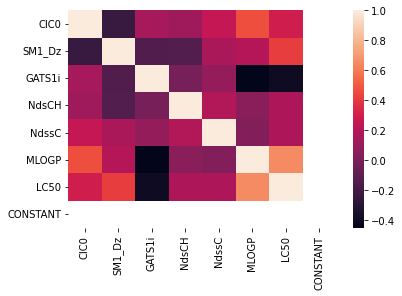

In [134]:
sns.heatmap(fish.corr())

In [135]:
fishmodel1 = ols("LC50 ~ CIC0 + SM1_Dz + GATS1i + NdsCH + CONSTANT  -1", fish).fit()
fishmodel1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   LC50   R-squared:                       0.802
Model:                            OLS   Adj. R-squared:                  0.762
Method:                 Least Squares   F-statistic:                     20.25
Date:                Fri, 01 Apr 2022   Prob (F-statistic):           8.36e-07
Time:                        21:40:14   Log-Likelihood:                -22.937
No. Observations:                  25   AIC:                             55.87
Df Residuals:                      20   BIC:                             61.97
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
CIC0           1.4796      0.427      3.461      0.002       0.588       2.371
SM1_Dz         2.4893      0.440      5.658      0.000       1.572       3.407
GATS1i        -2.4575      0.327     -7.526      0.000      -3.139      -1.776
NdsCH          0.4374      0.390      1.122      0.275      -0.375       1.250
CONSTANT       1.1447      1.109      1.032      0.314      -1.169       3.458
==============================================================================
Omnibus:                        5.482   Durbin-Watson:                   2.018
Prob(Omnibus):                  0.065   Jarque-Bera (JB):                3.490
Skew:                          -0.779   Prob(JB):                        0.175
Kurtosis:                       3.960   Cond. No.                         28.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [136]:
fishmodel2 = ols("LC50 ~ CIC0 + SM1_Dz + GATS1i +NdsCH  -1", fish).fit()
fishmodel2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   LC50   R-squared (uncentered):                   0.935
Model:                            OLS   Adj. R-squared (uncentered):              0.935
Method:                 Least Squares   F-statistic:                              3273.
Date:                Fri, 01 Apr 2022   Prob (F-statistic):                        0.00
Time:                        21:40:15   Log-Likelihood:                         -1372.5
No. Observations:                 908   AIC:                                      2753.
Df Residuals:                     904   BIC:                                      2772.
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
CIC0           1.2493      0.036     34.476      0.000       1.178       1.320
SM1_Dz         2.1548      0.077     28.009      0.000       2.004       2.306
GATS1i        -0.8471      0.079    -10.744      0.000      -1.002      -0.692
NdsCH          0.4811      0.061      7.870      0.000       0.361       0.601
==============================================================================
Omnibus:                       42.724   Durbin-Watson:                   1.818
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              129.302
Skew:                          -0.094   Prob(JB):                     8.36e-29
Kurtosis:                       4.839   Cond. No.                         8.01
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [137]:
anova_lm(fishmodel2)


,df,sum_sq,mean_sq,F,PR(>F)
CIC0,1.0,14820.511215,14820.511215,12258.852382,0.000000e+00
SM1_Dz,1.0,791.296427,791.296427,654.524392,4.932326e-109
GATS1i,1.0,142.180296,142.180296,117.605070,7.616425e-26
NdsCH,1.0,74.887565,74.887565,61.943585,1.007889e-14
Residual,904.0,1092.903456,1.208964,NaN,NaN


Since p-values from summary and  anova report, except p-value for CICO, look like perfect, there must be a problem that I don't understand.

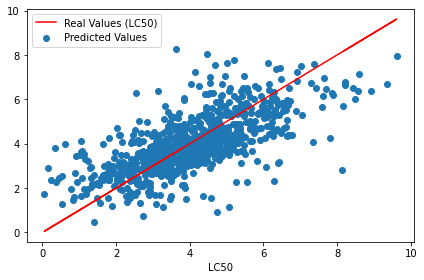

In [138]:
X = fish.loc[:,['CIC0','SM1_Dz' ,'GATS1i' ,'NdsCH']]
Ypredict=fishmodel2.predict(X)
Y = fish.loc[:,'LC50']
plt.plot(Y,Y, c="red",label="Real Values (LC50)")
plt.scatter(Y,Ypredict,label = "Predicted Values")
plt.legend()
plt.xlabel("LC50")
plt.tight_layout()
plt.show()


Q3

In [139]:
interconnections = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00211/CommViolPredUnnormalizedData.txt',
                               sep=',',
                               header=None)
interconnections

,0,1,2,3,4,5,6,7,8,9,...,137,138,139,140,141,142,143,144,145,146
0,BerkeleyHeightstownship,NJ,39,5320,1,11980,3.10,1.37,91.78,6.50,...,14,114.85,138,1132.08,16,131.26,2,16.41,41.02,1394.59
1,Marpletownship,PA,45,47616,1,23123,2.82,0.80,95.57,3.44,...,57,242.37,376,1598.78,26,110.55,1,4.25,127.56,1955.95
2,Tigardcity,OR,?,?,1,29344,2.43,0.74,94.33,3.43,...,274,758.14,1797,4972.19,136,376.3,22,60.87,218.59,6167.51
3,Gloversvillecity,NY,35,29443,1,16656,2.40,1.70,97.35,0.50,...,225,1301.78,716,4142.56,47,271.93,?,?,306.64,?
4,Bemidjicity,MN,7,5068,1,11245,2.76,0.53,89.16,1.17,...,91,728.93,1060,8490.87,91,728.93,5,40.05,?,9988.79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2210,Mercedcity,CA,?,?,10,56216,3.07,6.87,61.68,15.23,...,1376,2268.72,2563,4225.82,489,806.25,34,56.06,545.75,7356.84
2211,Pinevillecity,LA,?,?,10,12251,2.68,21.18,76.65,1.52,...,104,860.43,574,4748.9,24,198.56,2,16.55,124.1,5824.44
2212,Yucaipacity,CA,?,?,10,32824,2.46,0.52,92.62,0.98,...,628,1709.26,895,2435.97,179,487.19,8,21.77,353.83,4654.2
2213,Beevillecity,TX,?,?,10,13547,2.89,3.37,69.91,0.90,...,192,1508.01,474,3722.9,13,102.1,1,7.85,691.17,5340.87


In [140]:
col_names=pd.read_csv('/Users/ugur/Desktop/col.txt',sep='@attribute',header=None)
col_names=col_names.iloc[:,-1]
interconnections.columns=col_names


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/pandas/util/_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


In [141]:
interconnections.columns=interconnections.columns.str.replace(' ','_')

In [142]:
interconnections.columns=interconnections.columns.str.rstrip('numeric')
interconnections.columns=interconnections.columns.str.strip('_')
interconnections.columns

Index(['communityname_string',
       'State_{AK,AL,AR,AZ,CA,CO,CT,DC,DE,FL,GA,IA,ID,IL,IN,KS,KY,LA,MA,MD,ME,MI,MN,MO,MS,NC,ND,NH,NJ,NM,NV,NY,OH,OK,OR,PA,RI,SC,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY}',
       'countyCode', 'communityCode', 'fold', 'pop', 'perHoush', 'pctBlack',
       'pctWhite', 'pctAsian',
       ...
       'burglaries', 'burglPerPop', 'larcenies', 'larcPerPop', 'autoTheft',
       'autoTheftPerPop', 'arsons', 'arsonsPerPop', 'violentPerPop',
       'nonViolPerPop'],
      dtype='object', name=1, length=147)

In [143]:
for key in interconnections.columns:
    interconnections[key]=interconnections[key].replace('?',0)
    

In [144]:
print(interconnections.corr())

1                     fold       pop  perHoush  pctBlack  pctWhite  pctAsian  \
1                                                                              
fold              1.000000 -0.044338  0.015973 -0.040064  0.022973  0.004439   
pop              -0.044338  1.000000 -0.018841  0.135641 -0.184685  0.088360   
perHoush          0.015973 -0.018841  1.000000 -0.047455 -0.230117  0.186779   
pctBlack         -0.040064  0.135641 -0.047455  1.000000 -0.820605 -0.089300   
pctWhite          0.022973 -0.184685 -0.230117 -0.820605  1.000000 -0.276474   
...                    ...       ...       ...       ...       ...       ...   
popDensity       -0.032607  0.222695  0.023450  0.108230 -0.320438  0.294998   
pctUsePubTrans   -0.017758  0.328019 -0.048232  0.188926 -0.242762  0.230057   
pctOfficDrugUnit -0.003911  0.196209 -0.082140  0.250444 -0.262755  0.061110   
murders          -0.049480  0.959294 -0.011309  0.197541 -0.221444  0.046321   
murdPerPop       -0.029179  0.241682  0.

In [146]:
NewCrime=interconnections
for i in interconnections.corr().columns:
    if(i=='murders'):continue
    if abs(interconnections.corr().loc['murders',i])>0.7:
        NewCrime=NewCrime.drop(i, axis = 1)
        

In [147]:
Y=NewCrime.loc[:,'murders']
X=NewCrime.loc[:, NewCrime.columns != 'murders']
X=X.iloc[:,5:-1]


In [157]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, accuracy_score

In [149]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [150]:
reg = LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [155]:
reg.coef_

array([-6.34261616e-01,  1.91665946e-01,  2.36465238e-01,  1.60161935e-01,
        1.11444162e-01, -2.81143678e-02, -8.33723669e-02,  3.06741462e-01,
        3.02236481e-01,  6.62540950e-03,  3.35911528e-04,  1.41623103e-02,
        2.43483975e-01,  2.95088120e-02, -8.54194078e-02, -1.86904243e-01,
        3.47920418e-02, -2.88766904e-04, -2.04221305e-03,  2.05837050e-03,
        2.72036272e-05,  2.97373936e-06, -8.13116727e-07,  1.66652955e-05,
       -1.44524788e-05, -2.26188511e-02,  4.18522892e-02,  7.67564865e-02,
       -4.64526491e-02,  4.52880734e-01, -3.29485992e-02,  1.60700636e-02,
       -6.07503679e-02, -2.10825916e-02,  6.48522029e-02,  7.10755438e-01,
        2.21918777e-02,  8.45290207e-01, -1.05350794e+00,  5.94706435e+00,
       -3.48353862e-01,  4.61945872e-01, -1.05811301e-02, -1.09893025e-02,
       -3.53300607e-03,  3.49357652e-02, -5.16295065e-01,  2.08450830e-02,
       -3.93354247e-02,  1.35984052e-02,  1.11679373e-02, -1.84146638e-01,
        7.84809490e-01, -

In [156]:
predicted = reg.predict(X_test)


In [160]:
print("R^2: %.2f" %r2_score(y_test,predicted))


R^2: 0.82
